<h1 style="color:rgb(0,120,170)">Assignment 7: Neural Networks and a Glimpse at Pytorch </h1>

<h2 style="color:rgb(0,120,170)">Copyrighting and Fair Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you, as a student, to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - your 8-digit student number on ID card (without k)</li>
</ol>

**Example:**<br>
 ✅ Assignment_0_RenéDescartes_12345678<br>
 ✅ Assignment_0_SørenAabyeKierkegaard_12345678<br>
 ❌ Assignment0_Peter_Pan_k12345678

Don't add any cells but use the ones provided by us. You may notice that most cells are tagged such that the unittest routine can recognise them.

We highly recommend you to develop your code within the provided cells. You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. Don't import any other packages than listed in the cell with the "imports" tag.

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest they won't be available either.

*Good luck!*

<h2 style="color:rgb(0,120,170)">Task 1: The XOR Problem</h2>

**Task 1.1.**

In this task we try to formalize the fact that a single layer neural network (NN) cannot solve the XOR problem, but a two layer network can. 

Let us assume that we only have four possible inputs $\mathbf{x}_1 = (0,0)$,
$\mathbf{x}_2 = (1,0)$, $\mathbf{x}_3 = (0,1)$, and $\mathbf{x}_4 = (1,1)$ with the following labels $y_1=0$, $y_2=1$, $y_3=1$, and $y_4=0$, respectively. Note that this exactly describes the XOR function: it outputs 1 (=true) if and only if exactly one of the input components equals 1 (=true).

* As a first task show that if we use a linear network
$
    g_1(\mathbf{x};\mathbf{w})= \mathbf{x} \cdot \mathbf{w} = x^{(1)} w_1 + x^{(2)}  w_2,
$
 it is impossible to find parameters $w_1$ and $w_2$
  that solve this problem exactly.
  
**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

<h3 style="color:rgb(210,90,80)">Calculation (10 points):</h3>

We can derive four equations from the the XOR-problem:
$$ I: y_1 = x_1^{(1)}w_1+x_1^{(2)}w_2 = 0 * w_1 + 0 * w_2 = 0$$
$$ II: y_2 = x_2^{(1)}w_1+x_2^{(2)}w_2 = 1 * w_1 + 0 * w_2 = 1 => w_1 = 1$$
$$ III: y_3 = x_3^{(1)}w_1+x_3^{(2)}w_2 = 0 * w_1 + 1 * w_2 = 1 => w_2 = 1$$
$$ IV: y_4 = x_4^{(1)}w_1+x_4^{(2)}w_2 = 1 * w_1 + 1 * w_2 = 0 => w_1 + w_2 = 0$$

Based on equations $I/II$ we assume: $w_1 = 1$/$w_2 = 1$

However according to equation $IV$, $w_1 + w_2 = 0$ which leads to a contradiction:
$$w_1 + w_2 = 1 + 1 = 0$$

Therefore, it is impossible to find parameters if we use a linear network.

**Task 1.2.**

Even by adding bias units or by applying a sigmoid, the problem cannot be solved. 

However, as soon as we use a two-layer network with a simple non-linear activation function (ReLU):

$$   
g_2(\mathbf{x};\mathbf{W}^{[1]}, \mathbf{W}^{[2]}, \mathbf{b})=  \mathbf{W}^{[2]T} \max(0,\mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}),
$$

we can find parameters, that solve the problem. 
   * Precisely, show that $\mathbf{W}^{[1]}=\begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}$,
    $\mathbf{b}=\begin{pmatrix} 0 \\ -1 \end{pmatrix}$, and $\mathbf{W}^{[2]}=\begin{pmatrix} 1 \\ -2 \end{pmatrix}$ solve the problem
    in an exact way. The transformation $\max(0,\mathbf{W}^{[1]} \mathbf{x} + \mathbf{b})$ has 
    mapped the points $ \mathbf{x}_1,\ldots,  \mathbf{x}_4$ into a space, in which those data points are 
    linearly separable. 
    
**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

<h3 style="color:rgb(210,90,80)">Calculation (15 points):</h3>

I can show the ReLU holds by calculating the result for all 4 cases.

$$ 
g_1 = \begin{pmatrix}1 & -2\end{pmatrix} max[0, \begin{pmatrix}1 & 1\\1 & 1\end{pmatrix}\begin{pmatrix}0 \\ 0\end{pmatrix} + \begin{pmatrix}0 \\ -1\end{pmatrix}]\\
= \begin{pmatrix}1 & -2\end{pmatrix} max[0, \begin{pmatrix}0 \\ 0\end{pmatrix} + \begin{pmatrix}0 \\ -1\end{pmatrix}]\\
= \begin{pmatrix}1 & -2\end{pmatrix} max[0, \begin{pmatrix}0 \\ -1\end{pmatrix}]\\
= \begin{pmatrix}1 & -2\end{pmatrix} \begin{pmatrix}0 \\ 0\end{pmatrix} = 0 = y_1
$$

$$ 
g_2 = \begin{pmatrix}1 & -2\end{pmatrix} max[0, \begin{pmatrix}1 & 1\\1 & 1\end{pmatrix}\begin{pmatrix}1 \\ 0\end{pmatrix} + \begin{pmatrix}0 \\ -1\end{pmatrix}]\\
= \begin{pmatrix}1 & -2\end{pmatrix} max[0, \begin{pmatrix}1 \\ 1\end{pmatrix} + \begin{pmatrix}0 \\ -1\end{pmatrix}]\\
= \begin{pmatrix}1 & -2\end{pmatrix} max[0, \begin{pmatrix}1 \\ 0\end{pmatrix}]\\
= \begin{pmatrix}1 & -2\end{pmatrix} \begin{pmatrix}1 \\ 0\end{pmatrix} = 1 = y_2
$$

$$ 
g_3 = \begin{pmatrix}1 & -2\end{pmatrix} max[0, \begin{pmatrix}1 & 1\\1 & 1\end{pmatrix}\begin{pmatrix}0 \\ 1\end{pmatrix} + \begin{pmatrix}0 \\ -1\end{pmatrix}]\\
= \begin{pmatrix}1 & -2\end{pmatrix} max[0, \begin{pmatrix}1 \\ 1\end{pmatrix} + \begin{pmatrix}0 \\ -1\end{pmatrix}]\\
= \begin{pmatrix}1 & -2\end{pmatrix} max[0, \begin{pmatrix}1 \\ 0\end{pmatrix}]\\
= \begin{pmatrix}1 & -2\end{pmatrix} \begin{pmatrix}1 \\ 0\end{pmatrix} = 1 = y_3
$$

$$ 
g_4 = \begin{pmatrix}1 & -2\end{pmatrix} max[0, \begin{pmatrix}1 & 1\\1 & 1\end{pmatrix}\begin{pmatrix}1 \\ 1\end{pmatrix} + \begin{pmatrix}0 \\ -1\end{pmatrix}]\\
= \begin{pmatrix}1 & -2\end{pmatrix} max[0, \begin{pmatrix}2 \\ 2\end{pmatrix} + \begin{pmatrix}0 \\ -1\end{pmatrix}]\\
= \begin{pmatrix}1 & -2\end{pmatrix} max[0, \begin{pmatrix}2 \\ 1\end{pmatrix}]\\
= \begin{pmatrix}1 & -2\end{pmatrix} \begin{pmatrix}2 \\ 1\end{pmatrix} = 0 = y_4
$$

The output of the classifier g is indeed correct for all 4 cases.

<h2 style="color:rgb(0,120,170)">Task 2: Backprop of a Simple NN</h2>

Consider the following neural network (we try to adapt to the notation from the lecture):
<div>
<img src="nn_pic.png" width="500"/>
</div>

The preactivations of the hidden units are denoted as $s_3$, $s_4$ and $s_5$  from left to right, their activations as $a_3$, $a_4$ and $a_5$, respectively. In the hidden layer we use ReLU as activation function, i.e. $f_3(x)=f_4(x)=f_5(x)=\text{ReLU}(x)$, and in the output layer the activation is the identity function. The preactivation of the output layer is denoted as $s_6$ and the output as $\hat{y}$. The delta at the output is denoted as $\delta_6$, and the hidden deltas as $\delta_3$, $\delta_4$ and $\delta_5$ from left to right, respectively. The true label is $y=1$ and as loss function we use the mean-squared loss, i.e $L(y,\hat{y})=\frac12 (y-\hat{y})^2$.

Given values:

- $x_1=1$
- $x_2=1.5$
- $w_{31}=-0.1$
- $w_{41}=-1$
- $w_{51}=0.1$
- $w_{32}=0.5$
- $w_{42}=0$
- $w_{52}=-2$
- $w_{63}=1.2$
- $w_{64}=-1$
- $w_{65}=0.5$

* Compute all outputs, preactivations, activations, and delta errors! Also compute $\frac{\partial L}{\partial w_{32}}$. Write down formulas (not only the numerical result) that indicate your computations at least for $s_3$, $\delta_3$ and $\frac{\partial L}{\partial w_{32}}$.
* Additionally finish the python code that calculates the same results.

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

<h3 style="color:rgb(210,90,80)">Calculation (10 points):</h3>

Preactivations and activations:
$$ 
s_3 = \sum_{j=0}^{Q} w_{ij} a_j = w_{30}a_0 + w_{31}a_1 + w_{32}a_2 = w_{31}x_1 + w_{32}x_2
$$
$$
s_3= -0.1 * 1 + 0.5 * 1.5 = 0.65
$$
$$
a_3 = f(s_i) = f(s_3) = max(0, s_3) = max(0, 0.65) = 0.65
$$

$$
s_4 = w_{41}x_1 + w_{42}x_2 = -1 * 1 + 0 * 1.5 = -1
$$
$$
a_4 = max(0, -1) = 0
$$

$$
s_5 = w_{51}x_1 + w_{52}x_2 = 0.1 * 1 - 2 * 1.5 = -2.9
$$
$$
a_5 = max(0, -2.9) = 0
$$

$$
s_6 =  w_{63}a_3 + w_{64}a_4 + w_{65}a_5 = 1.2 * 0.65 - 1 * 0 + 0.5 * 0 = 0.78 
$$
$$
a_6 = max(0, 0.78) = 0.78
$$

Outputs:
$$
\hat{y} = a_6 = 0.78
$$

Delta errors:

The delta error of the output layer with the squared loss loss function is the difference between prediction and actual value (according to Unit 6/p.28).
$$
\delta_6 = \frac{\partial L(y,\hat{y})}{\partial s_6} = \frac{\partial L(y,\hat{y})}{\partial a_6} f'(s_k)
= \hat{y} - y = 0.78 - 1 = -0.22
$$

$$
\delta_3 = f'(s_j)\sum_{i=0}^{Q} \delta_iw_{ij} = f'(s_3) * (\delta_6 w_{63})
$$

The derivative of the ReLU activation function is:
$$
f'(x) = ReLU'(x) =
\begin{cases}
   \text{0} \quad\text{if x < 0}\\
   \text{1} \quad\text{if x > 0}
\end{cases}
$$

$$
\delta_3 = f'(0.65)*(-0.22*1.2) = 1*-0.264 = -0.264
$$
$$
\delta_4 = f'(-1)*(-0.22*-1) = 0*(-0.22*-1) = 0
$$
$$
\delta_5 = f'(-2.9)*(-0.22*0.5) = 0*(-0.22*0.5) = 0
$$

$$
\frac{\partial L}{\partial w_{ij}} =  \delta_i a_j
$$
$$
\frac{\partial L}{\partial w_{32}} =  \delta_3 a_2 = -0.264 * 1.5 = -0.396
$$

<h3 style="color:rgb(210,90,80)">Python implementation (15 points):</h3>

In [1]:
# Python Implementation
import numpy as np

# Notes on shapes of matrices:
# the pre-activations and activations should be row-vectors
# meaning shape = (1, ...). Think of it as having a mini-batch size of 1
# Check out the pytorch docs on the linear layer for the forward pass and the shape
# of the weight-layers ;)

input = np.array([1, 1.5]).reshape(1, -1)

weights_layer1 = np.array([[-0.1, 0.5], [-1, 0], [0.1, -2]])  # fill in the correct values
weights_layer2 = np.array([[1.2, -1, 0.5]])  # fill in the correct values

assert weights_layer1.shape == (3, 2)
assert weights_layer2.shape == (1, 3)

# Note: Every function can be easily written as a small one-liner
# If you have bigger functions, maybe think of a better solution :)

def relu(x):
    """calculate relu activation of x"""
    return np.maximum(0, x)


def derivative_relu(x):
    """calculate derivative of relu for input x"""
    return 0 if x < 0 else 1 if x > 0 else None


def calc_activation(preactivation):
    """calculate activation given pre-activation
    """
    return relu(preactivation)


def calc_preactivation(x, w):
    """calculate preactivation of a linear layer

    x: layer inputs
    w: layer weights
    """
    return np.sum(np.multiply(x, w), axis=1)


def calc_delta_6(y_hat, y):
    """delta error of last layer"""
    return y_hat - y


def calc_delta(s, delta_6, w):
    """delta error of non-last layer

    s: correct preactivation
    delta_6: delta error of last layer
    w: correct nn weight

    to get correct inputs check the formulas and their indices ;)
    """
    return derivative_relu(s) * delta_6 * w


def calc_derivative_L(delta_error, activation):
    """calc derivative of loss-fct w.r.t a certain weight.
    check formulas to now what delta_error and activation you have to
    provide :)
    """
    return delta_error * activation

<h2 style="color:rgb(0,120,170)">Task 2: Pytorch and a Visualization of the Vanishing Gradient Problem</h2>

The aim of this task is to provide you with some familiarity with Pytorch, a Python-package which is nowadays heavily used for tasks that involve computations with neural networks. It has the nice feature that it incorporates automatic differentiation, so that you don't have to implement the backward pass for a NN any more. It also allows for transferring more involved experiments to GPUs easily, however, we won't need this nice feature here. We will again work with the Fashion MNIST data set, but this time we provide you with a Pytorch routine that can download it for you and even transforms it appropriately.

* Your first task will be to just let the code run and plot some images. To this end you will need to install Pytorch appropriately in your Python library!

<h3 style="color:rgb(208,90,80)">Code (10 points)</h3>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
from types import SimpleNamespace
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Here we collect the hyperparameters we are going to use
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1,
                       lr=0.01, momentum=0.5, seed=1, log_interval=100)
torch.manual_seed(args.seed)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [4]:
#just printout for deeper view
print(args)
print(device)

namespace(batch_size=64, test_batch_size=1000, epochs=1, lr=0.01, momentum=0.5, seed=1, log_interval=100)
cpu


In [5]:
# Data loader (downloads data automatically the first time)
# 0.1307 and 0.3081 are the mean and the std computed on the training set
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(os.path.join('.','..','data'), train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(os.path.join('.','..','data'), train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

torch.Size([60000])
torch.Size([60000, 28, 28])
Input dimension is 784.


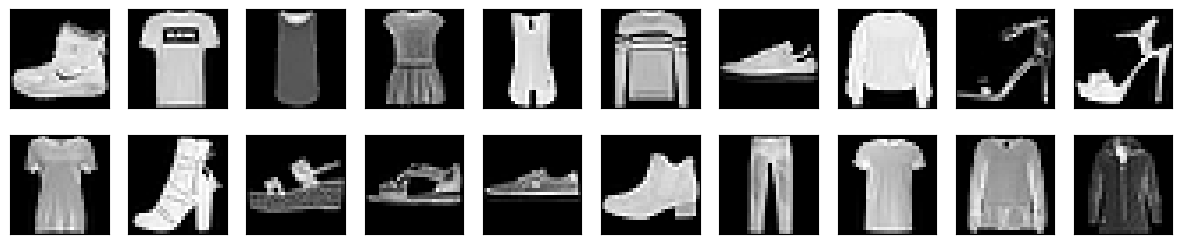

In [6]:
print(train_loader.dataset.targets.shape)
print(train_loader.dataset.data.shape)
input_dim = train_loader.dataset.data.shape[1]*train_loader.dataset.data.shape[2]
print("Input dimension is {}.".format(input_dim))
output_dim = 10

# Plot example images
fig=plt.figure(figsize=(15,3))
for image in range(20):
    show_img = train_loader.dataset.data[image].numpy().reshape(28, 28)
    fig.add_subplot(2,10,image+1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(show_img, cmap='gray')
plt.show()

Next, we provide you with code that you can use to create your own artificial neural network (ANN) in terms of a class. We will use a 3-hidden-layer NN with sigmoid activation here. As you should know from the lecture, sigmoid is not a very good choice as it induces vanishing gradients.

* To overcome this issue, create a second nework class in a similar way that again has the same three linear layers but instead uses the ReLU activation function which is known to prevent the gradients from vanishing. Don't change the output activation function.

<h3 style="color:rgb(208,90,80)">Code (10 points)</h3>

In [7]:
class ANN_sigmoid(nn.Module):
    def __init__(self, D_in, D_out):
        super(ANN_sigmoid, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, D_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.sigmoid(x)
        x = self.linear2(x)
        x = torch.sigmoid(x)
        x = self.linear3(x)
        x = torch.sigmoid(x)
        x = self.linear4(x)
        return F.log_softmax(x, dim=1)

In [8]:
class ANN_relu(nn.Module):
    #Your code for ReLU NN
    
    ## Solution start
    def __init__(self, D_in, D_out):
        super(ANN_relu, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, D_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        x = torch.relu(x)
        x = self.linear3(x)
        x = torch.relu(x)
        x = self.linear4(x)
    ## Solution end
        
        return F.log_softmax(x, dim=1)

Next, we provide you with a routine for training a neural network with Pytorch. For each layer, it outputs a list where one entry indicates the averaged absolute sum of the gradient magnitudes of the activations for a particular mini batch of this particular layer. Note that the command loss.backward() automatically computes and stores the gradients of all the activations. It also prints accuracy and the loss value for each epoch.

In [9]:
# This function trains the model for one epoch
# Nothing to do here
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    grads1_list = []
    grads2_list = []
    grads3_list = []
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = Variable(data.view(-1, input_dim))
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        
        # This part of the code gets the weights in the different layers
        grads3 = abs(model.linear3.weight.grad)
        grads2 = abs(model.linear2.weight.grad)
        grads1 = abs(model.linear1.weight.grad)
        grads3_list.append(torch.mean(grads3).item())
        grads2_list.append(torch.mean(grads2).item())
        grads1_list.append(torch.mean(grads1).item())
        
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
    print('\nTraining set: Accuracy: {}/{} ({:.2f}%)\n'.format(
    correct, len(train_loader.dataset),
    100. * correct / len(train_loader.dataset))) 
    return grads1_list, grads2_list, grads3_list

Here is a similar routine for the test procedure.

In [10]:
# This function evaluates the model on the test data
def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = Variable(data.view(-1, input_dim))
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))    

Finally, you are asked to execute the previously built functions. To this end, perform the following tasks:

* We provided the routine for creating the model with the sigmoid function and executing it on the cpu per default. As a first task, you are now asked to create an appropriate optimizer (take a look into imports cell). Use SGD with the parameters of the model and the learning rate and momentum from the hyperparameterlist args created in the beginning.
* Now write a code where you **the function** `train` **for number of** `epochs` **in our hyperparameters collection** `args`  with the required arguments for the **sigmoid model** and create a routine that **plots the output list of means of gradient magnitudes** for each layer appropriately. It should also output the test accuracy.
* Repeat the previous task but for ReLU model.

<h3 style="color:rgb(208,90,80)">Code (20 points)</h3>

<<< Sigmoid >>>

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.277038
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.317646
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.291698
Train Epoch: 0 [19200/60000 (32%)]	Loss: 2.326507
Train Epoch: 0 [25600/60000 (43%)]	Loss: 2.294538
Train Epoch: 0 [32000/60000 (53%)]	Loss: 2.306917
Train Epoch: 0 [38400/60000 (64%)]	Loss: 2.309592
Train Epoch: 0 [44800/60000 (75%)]	Loss: 2.314287
Train Epoch: 0 [51200/60000 (85%)]	Loss: 2.309519
Train Epoch: 0 [57600/60000 (96%)]	Loss: 2.285814

Training set: Accuracy: 6477/60000 (10.79%)



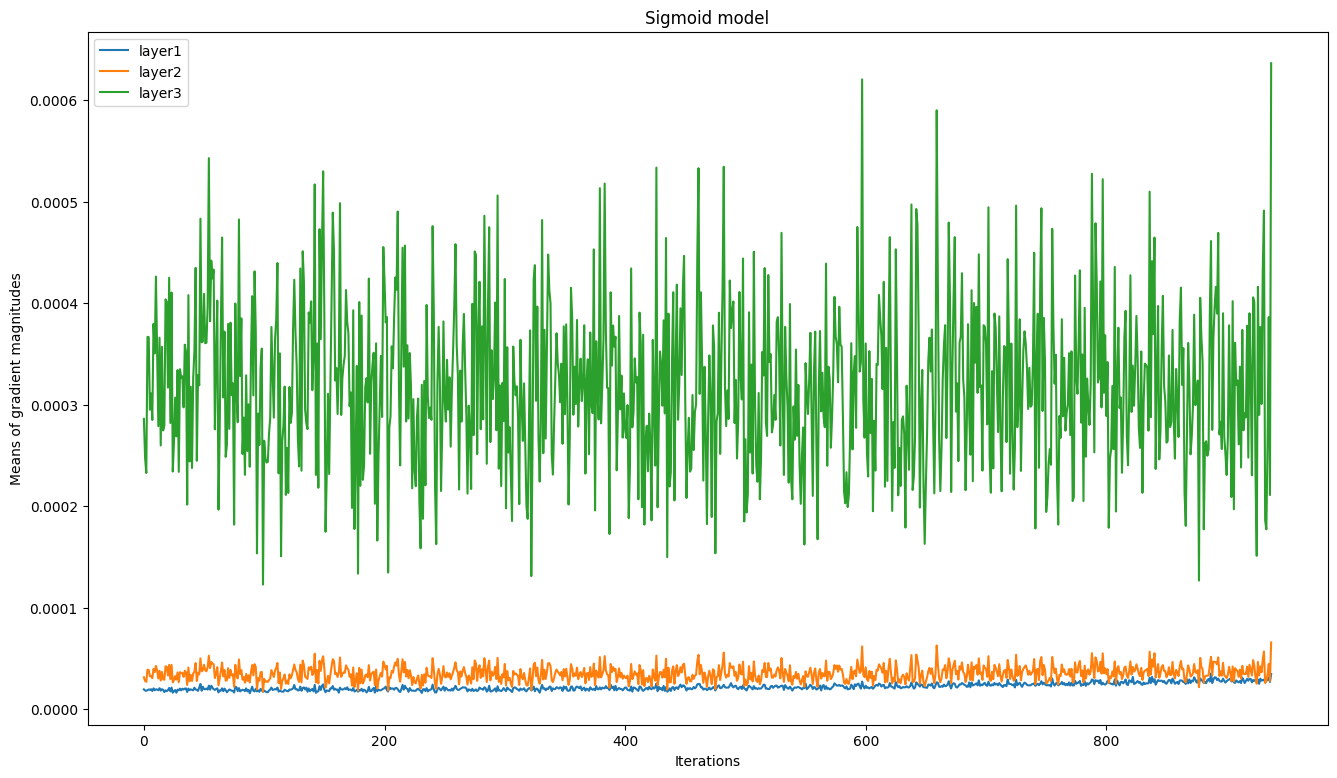

<<< ReLU >>>

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.312824
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.110503
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.786278
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.811500
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.709329
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.520027
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.598064
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.582573
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.422301
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.379372

Training set: Accuracy: 44497/60000 (74.16%)



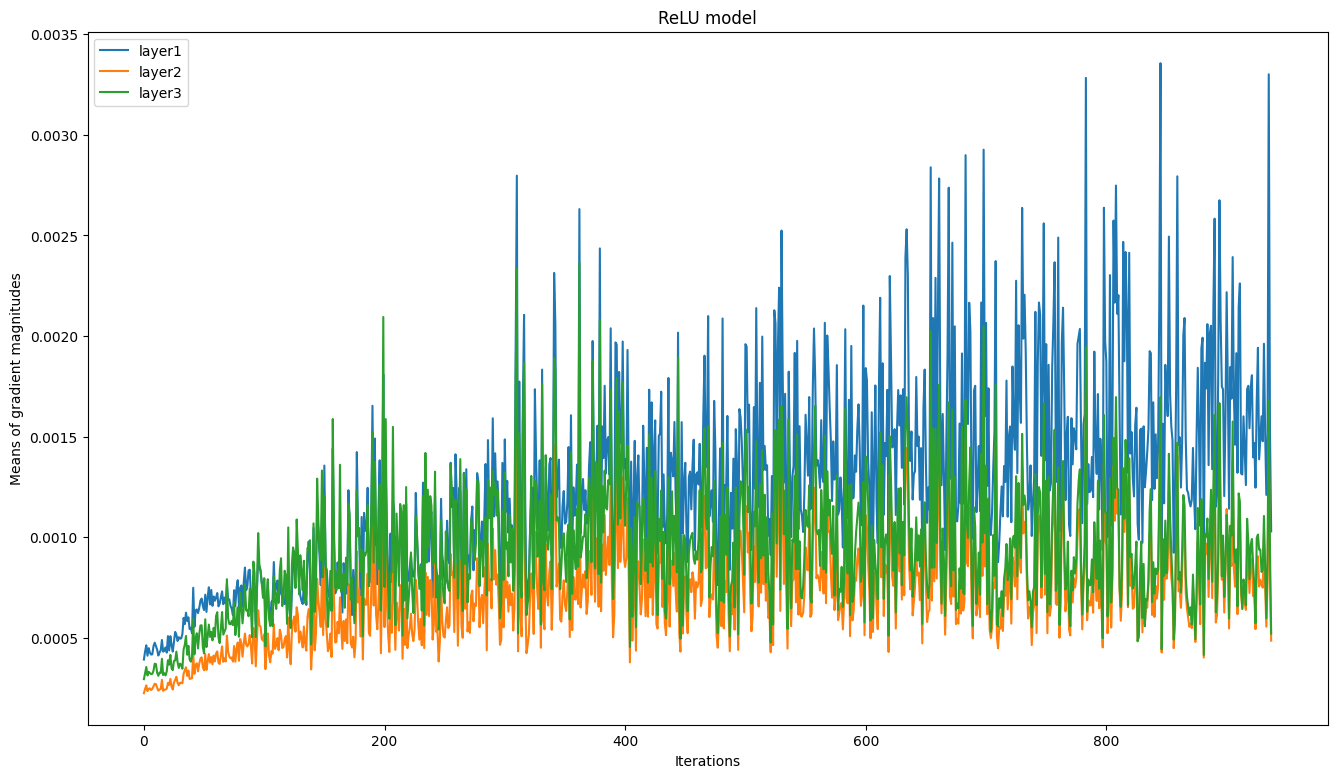

In [11]:
print("<<< Sigmoid >>>\n")
model = ANN_sigmoid(input_dim, output_dim).to(device)

#please use only predefined variables names
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum) #define SGD optimizer
epochs_range = range(args.epochs) #range you will iterate over

for epoch in epochs_range:
    grads1_list, grads2_list, grads3_list = train(args, model, device, train_loader, optimizer, epoch)
    
    #plot here together 3 different magnitudes
    plt.figure(figsize=(16, 9))
    plt.title('Sigmoid model')
    plt.xlabel('Iterations')
    plt.ylabel('Means of gradient magnitudes')
    plt.plot(range(len(grads1_list)), grads1_list, label='layer1')
    plt.plot(range(len(grads2_list)), grads2_list, label='layer2')
    plt.plot(range(len(grads3_list)), grads3_list, label='layer3')
    plt.legend()
    plt.show()
    
    #now test your model
    
######################################################################################    
print("<<< ReLU >>>\n")
model = ANN_relu(input_dim, output_dim).to(device) #define your ReLU model
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum) #redefine SGD optimizer

for epoch in epochs_range:
    #repeat operations of the loop above, but for ReLU model
    grads1_list, grads2_list, grads3_list = train(args, model, device, train_loader, optimizer, epoch)
    
    plt.figure(figsize=(16, 9))
    plt.title('ReLU model')
    plt.xlabel('Iterations')
    plt.ylabel('Means of gradient magnitudes')
    plt.plot(range(len(grads1_list)), grads1_list, label='layer1')
    plt.plot(range(len(grads2_list)), grads2_list, label='layer2')
    plt.plot(range(len(grads3_list)), grads3_list, label='layer3')
    plt.legend()
    plt.show()

<h3 style="color:rgb(210,90,80)">Question (10 points):</h3>

What observations for the sigmoid network and the ReLU network can you make? Tick the correct boxes (several may be correct):

a_)  The sigmoid network trains poorly in only one epoch. <br>
b_)  The means of magnitudes of the gradients for the sigmoid network are significantly higher for lower layers. This is an indication of the vanishing gradient problem. <br>
c_) One reason why the sigmoid network can lead to vanishing gradients might be that the derivative of the sigmoid does not exceed 1/4. <br>
d_)  When you use the ReLU activation function, the resulting network trains well in only one epoch. <br>
e_) One reason why several well-known activation functions different from sigmoid can lead to more stable training can be the fact that their derivatives are always larger than 1.

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [13]:
#your answers go here ↓↓↓
a_=True
b_=True
c_=True
d_=None
e_=None

Note, however, there are possible ways to improve the learning of the sigmoid network without changing the activation function and the network size (you are encouraged to make an educated guess and try out several choices), but still, the network archictecture seems to be too simple to really lead to a satisfying performance. In the upcoming assignment, we will further ellaborate on this issue.